In [51]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [52]:
X,y = make_regression(n_samples=500,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

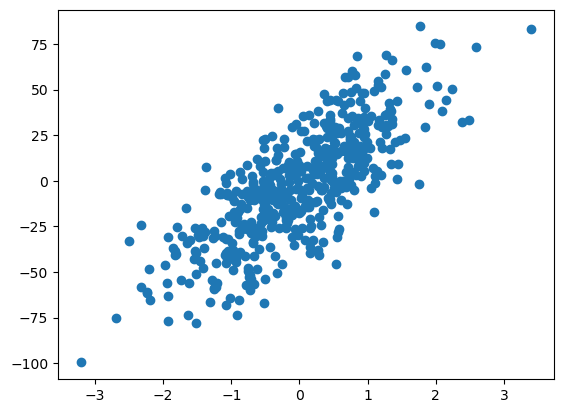

In [53]:
plt.scatter(X,y)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_, lr.coef_

(-2.5040668912689785, array([25.13820137]))

In [57]:
from sklearn.linear_model import Ridge

In [58]:
rr = Ridge(alpha=10)
rr.fit(X_train,y_train)
rr.intercept_, rr.coef_

(-2.508950164222374, array([24.46131684]))

In [59]:
rr1 = Ridge(alpha=100)
rr1.fit(X_train,y_train)
rr1.intercept_, rr1.coef_

(-2.5433739875379007, array([19.68973156]))

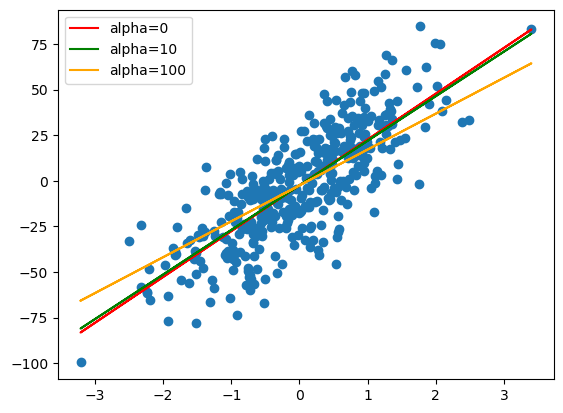

In [60]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red',label='alpha=0')
plt.plot(X_train,rr.predict(X_train),color='green',label='alpha=10')
plt.plot(X_train,rr1.predict(X_train),color='orange',label='alpha=100')
plt.legend()

In [61]:
y_pred1 =  lr.predict(X_test)
r2_score(y_test,y_pred1)

0.5512161271121605

In [62]:
y_pred2 =  rr.predict(X_test)
r2_score(y_test,y_pred2)

0.5501373822490965

In [63]:
y_pred3 =  rr1.predict(X_test)
r2_score(y_test,y_pred3)

0.520920747756803

# Ownclass

In [64]:
class RidgeRegression:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        numerator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            numerator += ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
            denominator += (X_train[i] - X_train.mean())**2
            
        self.m = numerator / (denominator + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m,self.b)
            
    def predict(self,X_test):
        return self.b + np.dot(X_test,self.m)
        

In [65]:
reg = RidgeRegression(alpha=100)

In [66]:
reg.fit(X_train,y_train)

[19.68973156] [-2.54337399]


In [67]:
y_pred = reg.predict(X_test)
y_pred

array([ 2.00468323e+01, -2.99815116e+01, -2.65780761e+01,  1.40716496e+01,
       -1.23482963e+01,  7.12176063e+00, -2.35531013e+01, -1.39537366e+01,
       -6.41273394e+00,  1.23990543e+01, -4.57572105e+00, -3.48166833e+01,
        6.12756855e+00,  1.39801215e+01, -3.41962765e+00, -3.27493236e+01,
        6.86371207e+00, -4.05027691e+01, -1.55894193e+01,  6.21260467e+00,
        4.84940655e+01,  1.14072836e+01, -2.37888443e+01,  1.27722521e+01,
       -1.01132426e+01, -2.32701204e+01, -3.68065733e-02,  4.15350191e+01,
       -2.56780030e+00, -1.11506546e+01,  1.47532655e+01, -6.91561135e+00,
       -1.44680965e+00, -1.37121660e+01,  6.53348693e+00,  8.53892813e+00,
       -2.33290143e+01,  1.33045975e+01, -2.63398388e+01, -1.75980226e+01,
       -1.64168526e+01, -3.13200311e+01, -2.19212356e+01,  5.06636240e-01,
        8.22214251e+00,  5.34578298e+00, -9.83086021e+00, -8.01976796e+00,
       -3.04833184e+00, -1.30802667e+01,  1.47834828e+00,  1.32059830e+01,
        2.38237674e+01, -

In [68]:
r2_score(y_test,y_pred)

0.5209207477568029